In [1]:
#Notebook to analyse different tags and their learning curve progression
#Should look at all the different conditions and how learning changes, say with and without acoustic features
#with acoustic features only etc.
#could also look into embedding changes

In [4]:
%matplotlib inline
import sys
sys.path.append("../../../../")

In [6]:
from deep_disfluency.evaluation.results_utils import extract_accuracies_from_file, accuracyCurvePlot

In [7]:
#the classes of interest

simple_tags = """<e/><cc>
    <e/><ct>
    <e/><tc>
    <e/><tt>
    <f/><cc>
    <f/><ct>
    <f/><tc>
    <f/><tt>
    <rm-0/><cc>
    <rm-0/><ct>""".split("\n")


learningCurveDict = {
                     }
for tag in simple_tags:
    learningCurveDict[tag.strip()] = []


extract_accuracies_from_file("../../results/tag_accuracies/033.text", learningCurveDict)
for key, val in learningCurveDict.items(): print key, val[40: -1]

<rm-0/><cc> [0.73, 0.73, 0.73, 0.73, 0.73, 0.73, 0.73, 0.73, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72]
<f/><cc> [0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.89, 0.89, 0.89, 0.89, 0.89]
<rm-0/><ct> [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
<e/><ct> [0.02, 0.02, 0.02, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.04]
<f/><ct> [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.29, 0.3, 0.3, 0.3, 0.3, 0.3]
<e/><tc> [0.6, 0.61, 0.61, 0.61, 0.6, 0.6, 0.59, 0.59, 0.59, 0.59, 0.59, 0.58, 0.58, 0.58]
<f/><tc> [0.54, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.52, 0.52, 0.52, 0.51, 0.51, 0.51, 0.51]
<e/><tt> [0.52, 0.52, 0.52, 0.53, 0.53, 0.53, 0.53, 0.53, 0.54, 0.54, 0.55, 0.55, 0.55, 0.55]
<e/><cc> [0.79, 0.79, 0.79, 0.79, 0.79, 0.79, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78]
<f/><tt> [0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.86, 0.86, 0.86, 0.86, 0.86]


plotting learning curve


/usr/local/lib/python2.7/dist-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


ValueError: x and y must have same first dimension

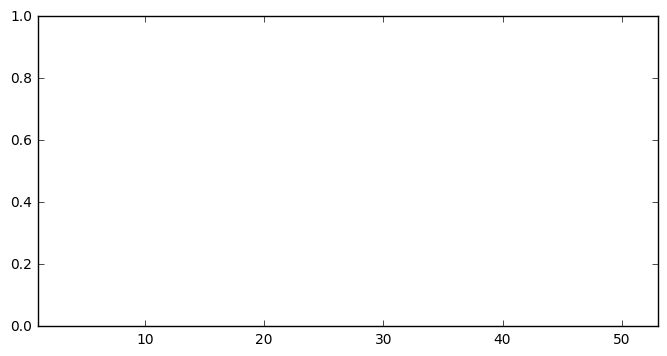

In [8]:
accuracyCurvePlot(learningCurveDict,53,'CONNLLgraph.pdf',upperlimit=1.0)

In [63]:
support = """<e/><cc>       0.76      0.90      0.82      2735
<e/><ct>       0.25      0.01      0.01       324
<e/><tc>       0.76      0.54      0.63       856
<e/><tt>       0.58      0.53      0.55        76
<f/><cc>       0.85      0.96      0.91     33970
<f/><ct>       0.55      0.17      0.26      3870
<f/><tc>       0.72      0.48      0.57      3368
<f/><tt>       0.94      0.85      0.89      1432
<rm-0/><cc>       0.81      0.68      0.74      2221
<rm-0/><ct>       0.00      0.00      0.00        30""".split("\n")

In [64]:
from collections import Counter

In [65]:
c = Counter()
scores  = {}
for line in support:
    print line
    data = line.strip('\n').split(" ")
    print data
    c[data[0]] = int(data[-1])
    scores[data[0]]  = float(data[19])

<e/><cc>       0.76      0.90      0.82      2735
['<e/><cc>', '', '', '', '', '', '', '0.76', '', '', '', '', '', '0.90', '', '', '', '', '', '0.82', '', '', '', '', '', '2735']
<e/><ct>       0.25      0.01      0.01       324
['<e/><ct>', '', '', '', '', '', '', '0.25', '', '', '', '', '', '0.01', '', '', '', '', '', '0.01', '', '', '', '', '', '', '324']
<e/><tc>       0.76      0.54      0.63       856
['<e/><tc>', '', '', '', '', '', '', '0.76', '', '', '', '', '', '0.54', '', '', '', '', '', '0.63', '', '', '', '', '', '', '856']
<e/><tt>       0.58      0.53      0.55        76
['<e/><tt>', '', '', '', '', '', '', '0.58', '', '', '', '', '', '0.53', '', '', '', '', '', '0.55', '', '', '', '', '', '', '', '76']
<f/><cc>       0.85      0.96      0.91     33970
['<f/><cc>', '', '', '', '', '', '', '0.85', '', '', '', '', '', '0.96', '', '', '', '', '', '0.91', '', '', '', '', '33970']
<f/><ct>       0.55      0.17      0.26      3870
['<f/><ct>', '', '', '', '', '', '', '0.55', '

In [66]:
for key, val in c.most_common():
    print key, val
print "888"
for key, val in sorted(scores.items(),key=lambda x: x[1], reverse=True):
    print key, val, c[key]

<f/><cc> 33970
<f/><ct> 3870
<f/><tc> 3368
<e/><cc> 2735
<rm-0/><cc> 2221
<f/><tt> 1432
<e/><tc> 856
<e/><ct> 324
<e/><tt> 76
<rm-0/><ct> 30
888
<f/><cc> 0.91 33970
<f/><tt> 0.89 1432
<e/><cc> 0.82 2735
<rm-0/><cc> 0.74 2221
<e/><tc> 0.63 856
<f/><tc> 0.57 3368
<e/><tt> 0.55 76
<f/><ct> 0.26 3870
<e/><ct> 0.01 324
<rm-0/><ct> 0.0 30
